In [90]:
import pandas as pd
import numpy as np

Data Source: http://web.mta.info/developers/turnstile.html.
Data consists of 13 weeks each from the beginning of 2019 and 2022

Function "get_data" taken from Metis MTA Exercises

In [2]:
# Source: 
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums_2019 = [190112, 190119, 190126, 190202, 190209, 190216, 190223, 190302, 190309, 190316, 190323, 190330, 190406]
week_nums_2022 = [220108, 220115, 220122, 220129, 220205, 220212, 220219, 220226, 220305, 220312, 220319, 220326, 220402]
turnstiles2019_df = get_data(week_nums_2019)
turnstiles2022_df = get_data(week_nums_2022)

In [3]:
turnstiles2019_df.columns = [column.strip() for column in turnstiles2019_df.columns]
turnstiles2022_df.columns = [column.strip() for column in turnstiles2022_df.columns]

In [4]:
from datetime import datetime, timedelta

From Metis MTA Exercises:

In [5]:
# Take the date and time fields into a single datetime column
turnstiles2019_df["DATE_TIME"] = pd.to_datetime(turnstiles2019_df.DATE + " " + turnstiles2019_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
turnstiles2022_df["DATE_TIME"] = pd.to_datetime(turnstiles2022_df.DATE + " " + turnstiles2022_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [6]:
turnstiles2019_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles2019_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
turnstiles2022_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles2022_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [7]:
turnstiles2019_time = (turnstiles2019_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())
turnstiles2022_time = (turnstiles2022_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],as_index=False)
                        .ENTRIES.first())

In [8]:
turnstiles2019_time[["PREV_TIME", "PREV_ENTRIES"]] = (turnstiles2019_time
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

turnstiles2022_time[["PREV_TIME", "PREV_ENTRIES"]] = (turnstiles2022_time
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/tmp/ipykernel_896/1750780187.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles2019_time[["PREV_TIME", "PREV_ENTRIES"]] = (turnstiles2019_time
/tmp/ipykernel_896/1750780187.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles2022_time[["PREV_TIME", "PREV_ENTRIES"]] = (turnstiles2022_time


In [9]:
# Drop the rows for the earliest date_time in the df
turnstiles2019_time.dropna(subset=["PREV_TIME"], axis=0, inplace=True)
turnstiles2022_time.dropna(subset=["PREV_TIME"], axis=0, inplace=True)

In [10]:
def get_time_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!

# Creates column of entries recorded at each datetime in the DATE_TIME column
turnstiles2019_time["TIME_ENTRIES"] = turnstiles2019_time.apply(get_time_counts, axis=1, max_counter=1000000)
turnstiles2022_time["TIME_ENTRIES"] = turnstiles2022_time.apply(get_time_counts, axis=1, max_counter=1000000)

26538897 4372016.0
4372928 26538897.0
26594498 4399580.0
4400722 26594498.0
26591052 12381894.0
12383507 26591052.0
26637117 12425908.0
12428476 26637117.0
67598819 10730723.0
10731304 67598819.0
67604768 10755609.0
10757180 67604768.0
5185516 14630916.0
14631708 5185516.0
5196016 14655214.0
14656605 5196016.0
836 5664363.0
83 7054160.0
151 3876009.0
2 2117780.0
235207703 68073706.0
191 2234841.0
1550 5527037.0
16 1949564347.0
459313 11323067.0
11324762 459708.0
459864 11324762.0
458801 6999931.0
3 67586631.0
74 2385882.0
62 552625973.0
226 10481828.0
1626 9913791.0
1804 3596117.0
207 1095857.0
50 3803351.0
200 1412600.0
97 6437364.0
11 6611558.0
100665047 5998739.0
21 4128118.0
146 1629651041.0
1539 2390375.0
33611839 186793.0
3844615 1319112.0
1319880 3846742.0
247 1276366720.0
155 9485331.0
579 7673049.0
19 5490768.0
459169 2909492.0
1797 1973537.0
7 1360328.0
35 6236784.0
1801 5389671.0
2196639 5869852.0
5870625 2196732.0
8416088 3032108.0
3032670 8416318.0
1776599 5100005.0
510080

Following function is adapted from StackOverflow: https://stackoverflow.com/questions/48937900/round-time-to-nearest-hour-python

In [11]:
def hour_rounder(t):
    # Rounds to nearest greater hour by adding a timedelta hour if time is not directly on the hour
    if (t.second != 0) or (t.microsecond !=0) or (t.minute !=0):
        return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour) + timedelta(hours=1))
    else: 
        return t

In [12]:
# Cleans up irregular timestamps
turnstiles2019_time.DATE_TIME = turnstiles2019_time.DATE_TIME.apply(hour_rounder)
turnstiles2022_time.DATE_TIME = turnstiles2022_time.DATE_TIME.apply(hour_rounder)

In [15]:
# Creates Time column to show timestamps without date information
turnstiles2019_time['TIME'] = turnstiles2019_time.DATE_TIME.dt.time
turnstiles2022_time['TIME'] = turnstiles2022_time.DATE_TIME.dt.time

In [17]:
# Organizes dataframe by station, collecting all entries from a datetime stamp into one per datetime
station2019_time = turnstiles2019_time.groupby(["STATION", "DATE_TIME"])[['TIME_ENTRIES']].sum().reset_index()
station2022_time = turnstiles2022_time.groupby(["STATION", "DATE_TIME"])[['TIME_ENTRIES']].sum().reset_index()

In [21]:
# Creates PREV_DATE_TIME column to easier calculate the time intervals that each row describes
station2019_time["PREV_DATE_TIME"] = station2019_time.groupby("STATION")['DATE_TIME'].apply(lambda ser: ser.shift(1))
station2022_time["PREV_DATE_TIME"] = station2022_time.groupby("STATION")['DATE_TIME'].apply(lambda ser: ser.shift(1))                                              

In [25]:
# Drops first rows with no PREV_DATE_TIME value
station2019_time.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)
station2022_time.dropna(subset=["PREV_DATE_TIME"], axis=0, inplace=True)

In [27]:
# Adds TIME_DELTA column to record what time interval the row describes
station2019_time["TIME_DELTA"] = station2019_time['DATE_TIME'] - station2019_time["PREV_DATE_TIME"]
station2022_time["TIME_DELTA"] = station2022_time['DATE_TIME'] - station2022_time["PREV_DATE_TIME"]

In [28]:
# Adds more discrete columns for Month, Day, WeekofYear, and Time
station2019_time['MONTH'] = station2019_time.DATE_TIME.dt.month
station2019_time['DAY'] = station2019_time.DATE_TIME.dt.day
station2022_time['MONTH'] = station2022_time.DATE_TIME.dt.month
station2022_time['DAY'] = station2022_time.DATE_TIME.dt.day
station2019_time['WEEK'] = station2019_time.DATE_TIME.dt.week
station2022_time['WEEK'] = station2022_time.DATE_TIME.dt.week
station2019_time['TIME'] = station2019_time.DATE_TIME.dt.time
station2022_time['TIME'] = station2022_time.DATE_TIME.dt.time

/tmp/ipykernel_896/2306279733.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station2019_time['WEEK'] = station2019_time.DATE_TIME.dt.week
/tmp/ipykernel_896/2306279733.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station2022_time['WEEK'] = station2022_time.DATE_TIME.dt.week


In [58]:
# Creates labels for each row so we now how many hours they represent
station2019_time["INT_LABEL"] = station2019_time.TIME.astype(str) + ' ' + (station2019_time["TIME_DELTA"].dt.seconds//3600).astype(str) + ' hour(s)'
station2022_time["INT_LABEL"] = station2019_time.TIME.astype(str) + ' ' + (station2019_time["TIME_DELTA"].dt.seconds//3600).astype(str) + ' hour(s)'

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

In [75]:
# Aggregates the entries by timestamp for 2019
total_entries_by_time_2019 = station2019_time.groupby(['DATE_TIME']).TIME_ENTRIES.sum().reset_index()
total_entries_by_time_2019['TIME'] = total_entries_by_time_2019['DATE_TIME'].dt.time
total_entries_by_time_2019['MONTH'] = total_entries_by_time_2019.DATE_TIME.dt.month
total_entries_by_time_2019['DAY'] = total_entries_by_time_2019.DATE_TIME.dt.day
total_entries_by_time_2019['WEEK'] = total_entries_by_time_2019.DATE_TIME.dt.week

/tmp/ipykernel_896/544309668.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  total_entries_by_time_2019['WEEK'] = total_entries_by_time_2019.DATE_TIME.dt.week


In [76]:
# Aggregates the entries by timestamp for 2022
total_entries_by_time_2022 = station2022_time.groupby(['DATE_TIME']).TIME_ENTRIES.sum().reset_index()
total_entries_by_time_2022['TIME'] = total_entries_by_time_2022['DATE_TIME'].dt.time
total_entries_by_time_2022['MONTH'] = total_entries_by_time_2022.DATE_TIME.dt.month
total_entries_by_time_2022['DAY'] = total_entries_by_time_2022.DATE_TIME.dt.day
total_entries_by_time_2022['WEEK'] = total_entries_by_time_2022.DATE_TIME.dt.week

/tmp/ipykernel_896/1195595901.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  total_entries_by_time_2022['WEEK'] = total_entries_by_time_2022.DATE_TIME.dt.week


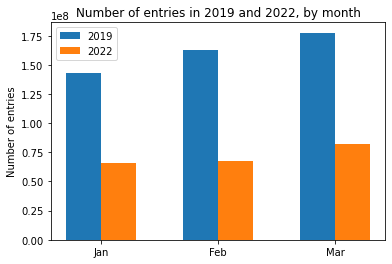

In [94]:
# Creates bar chart, showing total entries per month for 2019 and 2022
plt.bar([1, 2, 3], total_entries_by_time_2019.groupby("MONTH")["TIME_ENTRIES"].sum()[0:3], width = .3, label="2019")
plt.bar([1.3, 2.3, 3.3], total_entries_by_time_2022.groupby("MONTH")["TIME_ENTRIES"].sum()[0:3], width = .3, label="2022")
plt.xticks([1.15, 2.15, 3.15], ["Jan", "Feb", "Mar"])
plt.ylabel("Number of entries")
plt.title("Number of entries in 2019 and 2022, by month")
plt.legend(["2019", "2022"])

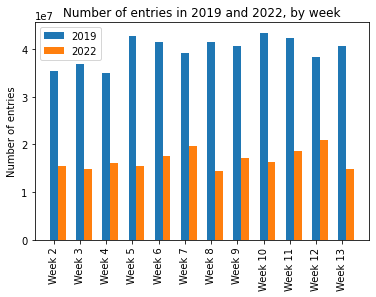

In [101]:
# Creates bar chart showing entries per week for 2019 and 2022
# Excludes week 1 and week 14 because 2022 has more data for Week 1 January and 2019 has more data for Week 1 April

week_labels = ["Week {}".format(x) for x in range(2,14)]
plt.bar(np.arange(2,14), total_entries_by_time_2019.groupby("WEEK")["TIME_ENTRIES"].sum()[1:13], width = .3, label="2019")
plt.bar(np.arange(2,14) + .3 , total_entries_by_time_2022.groupby("WEEK")["TIME_ENTRIES"].sum()[1:13], width = .3, label="2022")
plt.xticks(np.arange(2,14)  , week_labels, rotation=90)
plt.ylabel("Number of entries")
plt.title("Number of entries in 2019 and 2022, by week")
plt.legend(["2019", "2022"])

In [104]:
#Adds weekday column to look closer at ridership trends within week
total_entries_by_time_2019["WEEKDAY"] = total_entries_by_time_2019.DATE_TIME.dt.weekday
total_entries_by_time_2022["WEEKDAY"] = total_entries_by_time_2022.DATE_TIME.dt.weekday

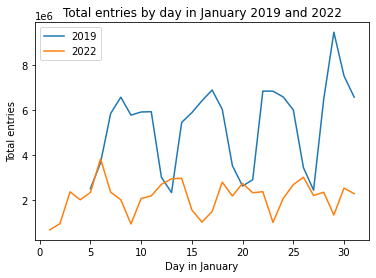

In [118]:
# Creates a line plot showing entries for each day in January
plt.plot(total_entries_by_time_2019[total_entries_by_time_2019["MONTH"] == 1].groupby("DAY")["TIME_ENTRIES"].sum())
plt.plot(total_entries_by_time_2022[total_entries_by_time_2022["MONTH"] == 1].groupby("DAY")["TIME_ENTRIES"].sum())
plt.title("Total entries by day in January 2019 and 2022")
plt.ylabel("Total entries")
plt.xlabel("Day in January")
plt.legend(['2019', '2022'])

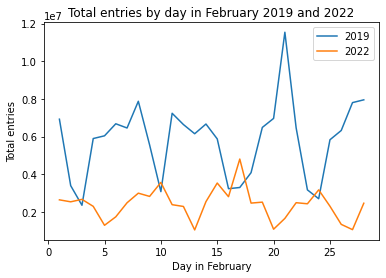

In [116]:
# Creates a line plot showing entries for each day in February
plt.plot(total_entries_by_time_2019[total_entries_by_time_2019["MONTH"] == 2].groupby("DAY")["TIME_ENTRIES"].sum())
plt.plot(total_entries_by_time_2022[total_entries_by_time_2022["MONTH"] == 2].groupby("DAY")["TIME_ENTRIES"].sum())
plt.title("Total entries by day in February 2019 and 2022")
plt.ylabel("Total entries")
plt.xlabel("Day in February")
plt.legend(['2019', '2022'])

Text(0.5, 0, 'Day in March')

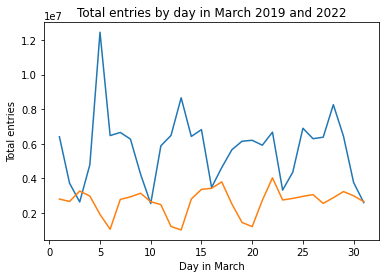

In [117]:
plt.plot(total_entries_by_time_2019[total_entries_by_time_2019["MONTH"] == 3].groupby("DAY")["TIME_ENTRIES"].sum())
plt.plot(total_entries_by_time_2022[total_entries_by_time_2022["MONTH"] == 3].groupby("DAY")["TIME_ENTRIES"].sum())
plt.title("Total entries by day in March 2019 and 2022")
plt.ylabel("Total entries")
plt.xlabel("Day in March")

In [128]:
# Gets total entries per day
total_entries_by_day_2019 = total_entries_by_time_2019.groupby(['WEEK', 'WEEKDAY'])['TIME_ENTRIES'].sum().reset_index()
total_entries_by_day_2022 = total_entries_by_time_2022.groupby(['WEEK', 'WEEKDAY'])['TIME_ENTRIES'].sum().reset_index()



,WEEK,WEEKDAY,TIME_ENTRIES
1,1,6,3649223.0
3,2,1,6572885.0
12,3,3,6891695.0
17,4,1,6844861.0
24,5,1,9465368.0
34,6,4,7873144.0
37,7,0,7234536.0
47,8,3,11541611.0
54,9,3,7949989.0
59,10,1,12451582.0


In [129]:
# Creates datafram with days that had the highest number of entries in their respective weeks
top_entry_day_2019 = total_entries_by_day_2019.sort_values("TIME_ENTRIES", ascending=False).drop_duplicates(["WEEK"]).sort_values("WEEK")
top_entry_day_2022 = total_entries_by_day_2022.sort_values("TIME_ENTRIES", ascending=False).drop_duplicates(["WEEK"]).sort_values("WEEK")

<AxesSubplot:title={'center':'# of times weekday recorded top entries from January - March, 2019'}, xlabel='Day of week at which top entries recorded (Monday = 0)', ylabel='# of times top entries recorded'>

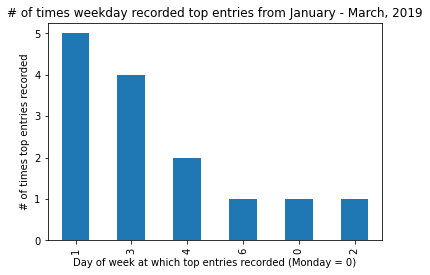

In [140]:
# Creates bar graph showing number of times each weekday had the highest number of entries in its week
top_entry_day_2019.WEEKDAY.value_counts().plot( 
                                kind='bar', 
                                xlabel="Day of week at which top entries recorded (Monday = 0)",
                                ylabel="# of times top entries recorded",
                               title="# of times weekday recorded top entries from January - March, 2019")


<AxesSubplot:title={'center':'# of times weekday recorded top entries from January - March, 2022'}, xlabel='Day of week at which top entries recorded (Monday = 0)', ylabel='# of times top entries recorded'>

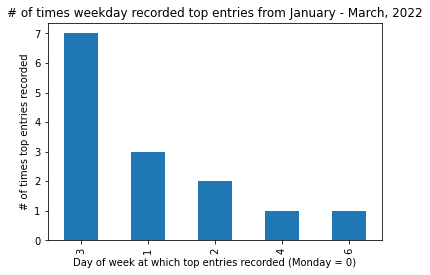

In [141]:
# Creates bar graph showing number of times each weekday had the highest number of entries in its week
top_entry_day_2022.WEEKDAY.value_counts().plot( 
                                kind='bar', 
                                xlabel="Day of week at which top entries recorded (Monday = 0)",
                                ylabel="# of times top entries recorded",
                               title="# of times weekday recorded top entries from January - March, 2022")

In [70]:
# Gets total number of entries in 2019 and 2022
total_volume_2019 = total_entries_by_time_2019.TIME_ENTRIES.sum()
total_volume_2022 = total_entries_by_time_2022.TIME_ENTRIES.sum()
print(total_volume_2019)
print(total_volume_2022)

515395304.0
218666522.0


In [65]:
#Sorts the table by the entries at each time in the entire subway system, then drops duplicates from the same day
#The result is a table that shows the highest traffic recorded in the subway per day, by the time it was recorded
top_entries_perday_2019 = total_entries_by_time_2019.sort_values('TIME_ENTRIES', ascending=False).drop_duplicates(['MONTH','DAY']).sort_values(["MONTH", "DAY"])
top_entries_perday_2022 = total_entries_by_time_2022.sort_values('TIME_ENTRIES', ascending=False).drop_duplicates(['MONTH','DAY']).sort_values(["MONTH", "DAY"])




<AxesSubplot:title={'center':'# of times time interval recorded top entries from January - March, 2019'}, xlabel='Time at which top entries recorded', ylabel='# of times top entries recorded'>

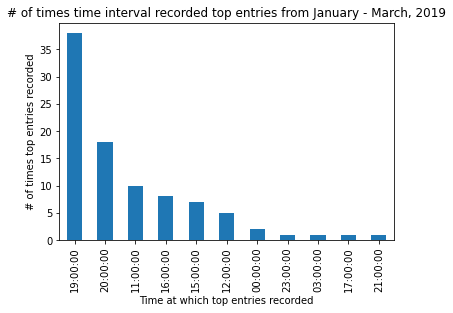

In [144]:
# Creates bar graph showing frequency with which a particular timestamp records the top entries
top_entries_perday_2019.TIME.value_counts().plot(kind='bar', 
                                xlabel="Time at which top entries recorded",
                                ylabel="# of times top entries recorded",
                               title="# of times time interval recorded top entries from January - March, 2019")

<AxesSubplot:title={'center':'# of times time interval recorded top entries from January - March, 2022'}, xlabel='Time at which max entries recorded', ylabel='# of times max entries recorded'>

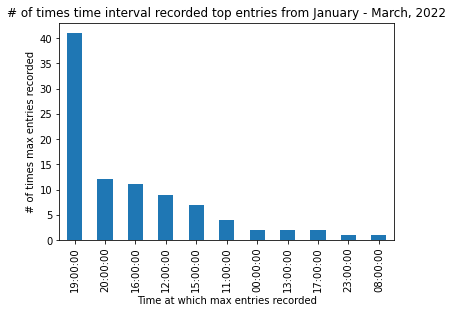

In [145]:
top_entries_perday_2022.TIME.value_counts().plot(kind='bar', 
                                xlabel="Time at which max entries recorded",
                                ylabel="# of times max entries recorded",
                               title="# of times time interval recorded top entries from January - March, 2022")